In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

In [3]:
# Step 1: Data Collection - Download stock data from Yahoo Finance
stock_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2010-01-01'
end_date = '2024-01-01'

data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Step 2: Preprocessing the data
# Use 'Close' prices for prediction
data = data[['Close']]

# Normalize the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
# Step 3: Prepare data for LSTM (Create sequences)
train_size = int(len(scaled_data) * 0.8)  # Use 80% for training
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create training and testing datasets
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape the input data to be in the shape (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [6]:
# Step 4: Build the LSTM model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\workplace\stock_prediction_using_ANN\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Step 5: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0073
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 6.3127e-04
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.2275e-04
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 4.1815e-04
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 4.2528e-04
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 4.9737e-04
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 4.4865e-04
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 4.0353e-04
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 3.4221e-04
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 4.1494e-04


In [8]:
# Step 6: Make predictions
predicted_stock_price = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [9]:
# Step 7: Inverse transform the predictions and test data
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

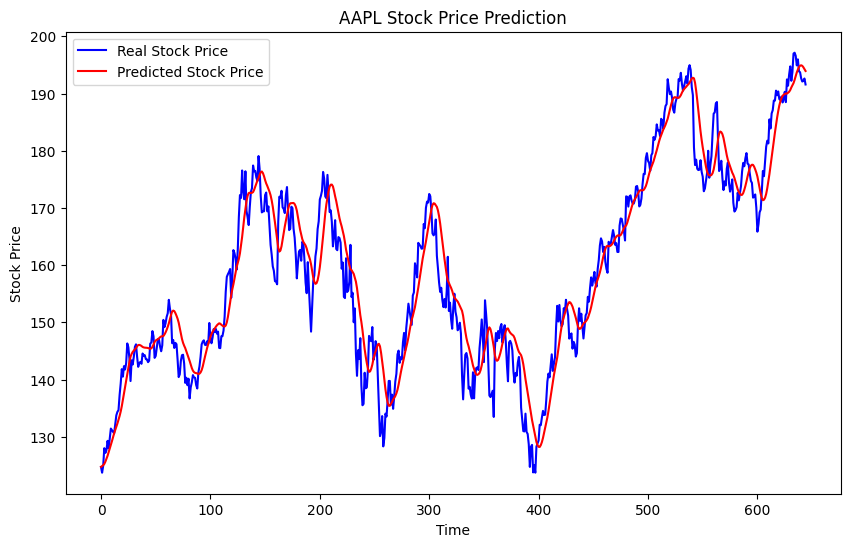

In [10]:
# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='blue', label='Real Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()